Code erstellt nach Tutorial, identsiche Codezeilen nach:
Parashar, A. (2020, 13. Oktober). Sentiment Analysis web app using NLTK and Heroku. medium. https://medium.com/pythoneers/sentiment-analysis-web-app-using-nltk-and-heroku-96ccd37c44ef

In [1]:
import numpy as np
import pickle
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

# Logistische Regression 

Hier werden Daten mittels Logistischer Regession trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.


In [2]:
regr = linear_model.LogisticRegression()
lrModel = regr.fit(X_train, y_train)

print(lrModel.score(X_test, y_test))

0.8704


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prediction - mit Logisticher Regression als Trainingsmodell


In [3]:
y_pred = lrModel.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


## Modell bewerten - mittels Mittlerer Quadratischer Abweichung und Bestimmtheitsmaß

In [4]:
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print(mse, score)

0.1296 0.4815745971552605


## Modell bewerten - mittels Confusion Matrix und Accuracy Score

[[4354  681]
 [ 615 4350]] 87.03999999999999


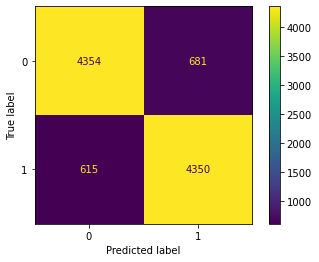

In [5]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Speichern des Modells - das trainierte Modell wird als Datei gespeichert

In [6]:
# Save trained model to file
pickle.dump(lrModel, open("lr_review.pkl", "wb"))

## Erneutes Laden des Modells in einer Variable

In [7]:
loaded_model = pickle.load(open("lr_review.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8704